# Plot Results
This files does the following
1. load packages
2. load specified datafile
3. plots data and shows results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("savefolderpytorch\\results_cluster.csv")

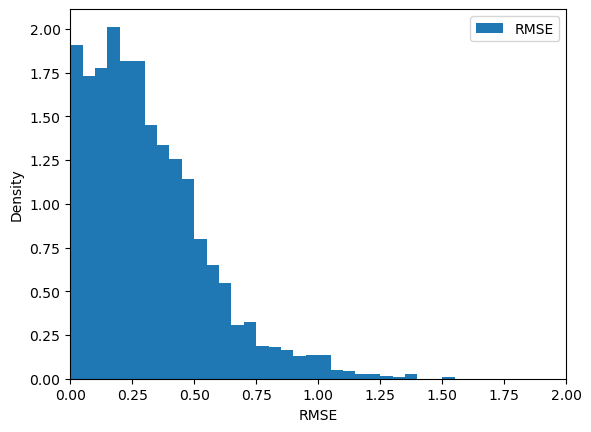

In [3]:
plt.hist(df["RMSE"], bins=40, range=(0, 2), density=True, label="RMSE")
plt.xlabel("RMSE")
plt.ylabel("Density")
plt.xlim(0, 2)
plt.legend()
plt.show()

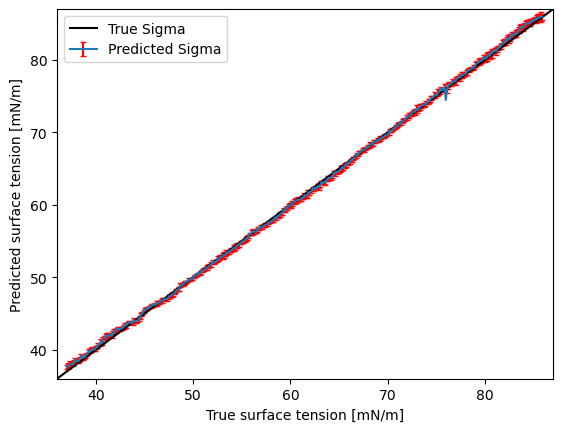

In [4]:
plt.errorbar(x=np.linspace(37, 85.875, 391), y=df.groupby("sigmatrue")["sigmapred"].mean(), yerr = df.groupby("sigmatrue")["sigmapred"].std(), label="Predicted Sigma", ecolor="red", capsize=2)
plt.plot(np.linspace(30, 100,70), np.linspace(30,100,70), color="black", label="True Sigma")
plt.xlim(36, 87)
plt.ylim(36, 87)
plt.legend()
plt.xlabel("True surface tension [mN/m]")
plt.ylabel("Predicted surface tension [mN/m]")
plt.show()

In [5]:
# Residuals
df["diff"] = np.abs(df.sigmatrue-df.sigmapred)

In [6]:
# Difference < 0.5 mN/m
df[df["diff"]<0.5].__len__()/df.__len__()

0.8120204603580563

In [7]:
# Difference < 1 mN/m
df[df["diff"]<1].__len__()/df.__len__()

0.9829497016197783

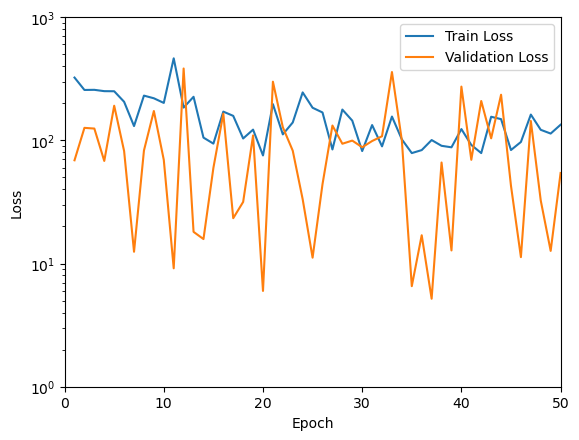

In [9]:
# Plot training loss (note that the loss is the sum of MSEloss per epoch instead of the mean)
plt.plot(pd.read_csv('savefolderpytorch\\train_cluster.csv').groupby("epoch")["loss"].mean(),label="Train Loss")
plt.plot(pd.read_csv('savefolderpytorch\\val_cluster.csv').groupby("epoch")["loss"].mean(),label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.yscale("log")
plt.xlim(0, 50)
plt.ylim(1, 1000)
plt.show()
